<a href="https://www.kaggle.com/code/noahhaag/fish-length-weight-exploration?scriptVersionId=216863872" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv


# Load data

In [2]:
df = pd.read_csv('/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv')

In [3]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


# Data exploration 

## Summary statistics

In [4]:
df.groupby('species')['length'].mean().sort_values(ascending = False)

species
Sillaginopsis panijus     31.066923
Coilia dussumieri         24.346048
Otolithoides pama         21.800253
Otolithoides biauritus    18.549893
Setipinna taty            17.811833
Puntius lateristriga      13.071938
Polynemus paradiseus      12.946812
Pethia conchonius          9.604800
Anabas testudineus         8.179139
Name: length, dtype: float64

In [5]:
df.groupby('species')['weight'].mean().sort_values(ascending = False)

species
Sillaginopsis panijus     6.143143
Pethia conchonius         4.585453
Polynemus paradiseus      3.989782
Otolithoides pama         3.849563
Anabas testudineus        3.271239
Otolithoides biauritus    3.198355
Setipinna taty            3.101750
Coilia dussumieri         2.747711
Puntius lateristriga      2.632799
Name: weight, dtype: float64

In [6]:
df.groupby('species')['w_l_ratio'].mean().sort_values(ascending = False)

species
Pethia conchonius         0.485747
Anabas testudineus        0.406176
Polynemus paradiseus      0.313231
Puntius lateristriga      0.203254
Sillaginopsis panijus     0.198264
Otolithoides pama         0.177149
Setipinna taty            0.174437
Otolithoides biauritus    0.173013
Coilia dussumieri         0.112988
Name: w_l_ratio, dtype: float64

## Plots

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length', ylabel='Count'>

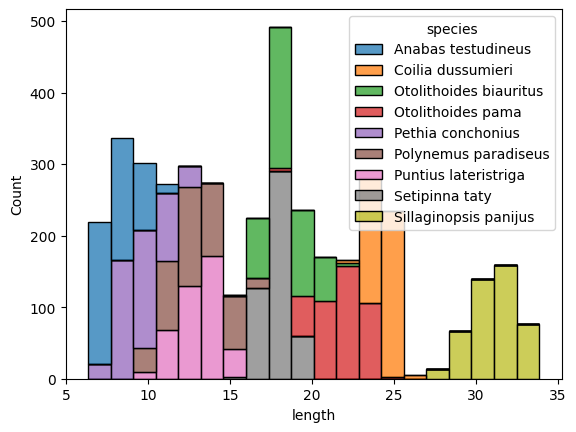

In [8]:
sns.histplot(df, x = "length", hue = "species", multiple = "stack")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight', ylabel='Count'>

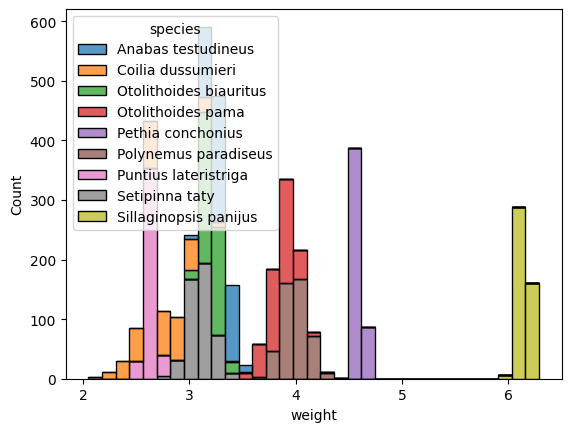

In [9]:
sns.histplot(df, x = "weight", hue = "species", multiple = "stack")

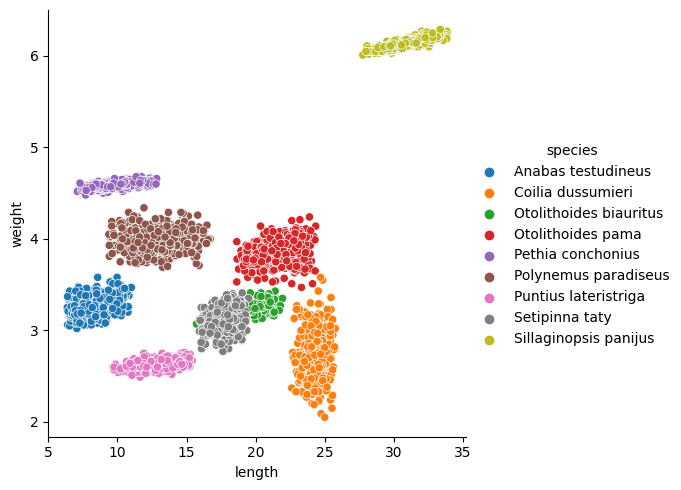

In [10]:
sns.relplot(df, x='length', y='weight', hue='species')

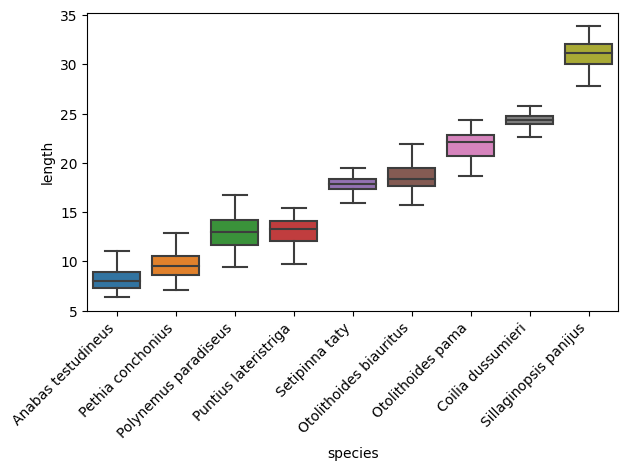

In [11]:
sns.boxplot(df,
            x="species",
            y="length",
            order=df.groupby(by=["species"])["length"].median().sort_values().index)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout() 
plt.show()

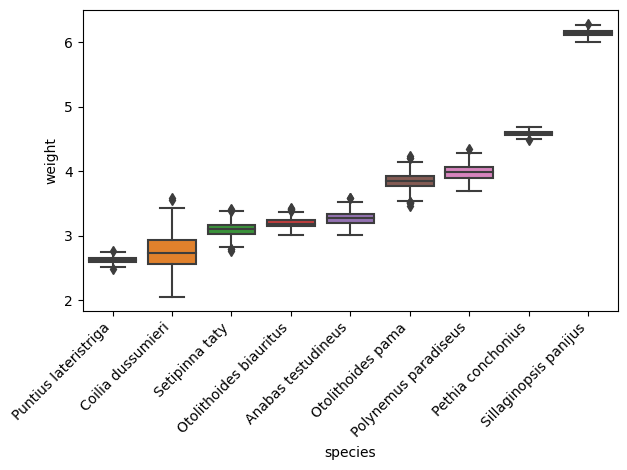

In [12]:
sns.boxplot(df,
            x="species",
            y="weight",
            order=df.groupby(by=["species"])["weight"].median().sort_values().index)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout() 
plt.show()

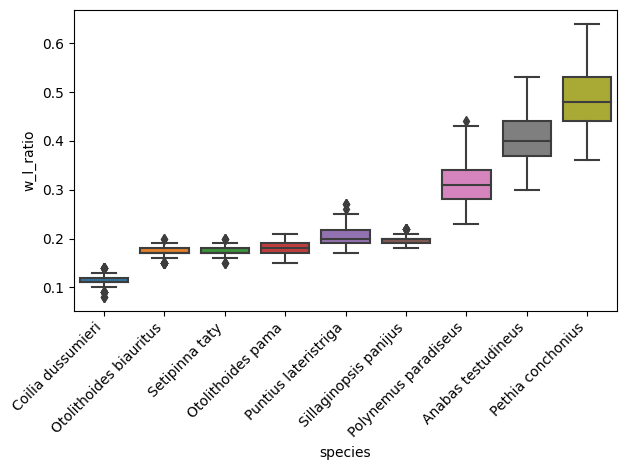

In [13]:
sns.boxplot(df,
            x="species",
            y="w_l_ratio",
            order=df.groupby(by=["species"])["w_l_ratio"].median().sort_values().index)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout() 
plt.show()